<a href="https://colab.research.google.com/github/MarcosLevySilveira/stocksetups/blob/main/Stock_Trade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!pip install pandas yfinance openpyxl
!pip install mplfinance


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 2.1 MB/s eta 0:00:00


Digite o código da ação brasileira: mglu3
[*********************100%%**********************]  1 of 1 completed
Resultados do Setup 9.2 para a Ação mglu3:
Setup Formed: 7
Setup Stopped: 6
Setup Completed: 1
Total Earnings: R$-1.02
Total Costs: R$34.81

Detalhes do Desempenho das Negociações:
Negociação 1 - Data de Entrada: 2022-01-28 00:00:00, Data de Saída: 2022-02-02 00:00:00
Preço de Entrada: R$7.21, Preço de Saída: R$7.09
Lucro: R$-0.12, Custo: R$7.21



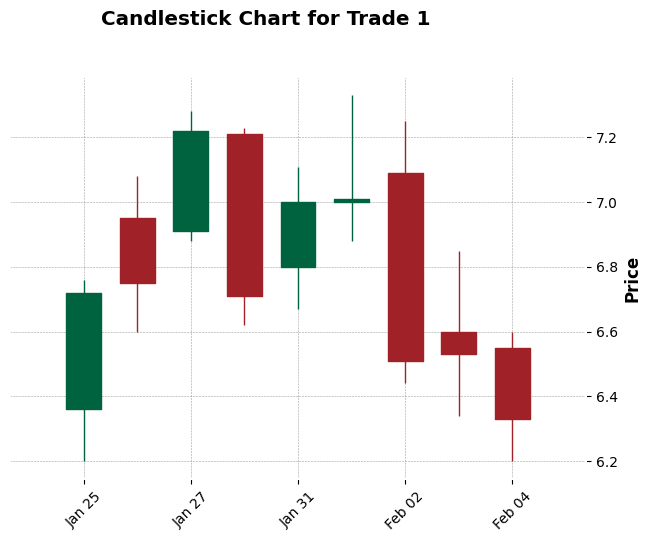


Negociação 2 - Data de Entrada: 2022-04-05 00:00:00, Data de Saída: 2022-04-06 00:00:00
Preço de Entrada: R$7.17, Preço de Saída: R$6.81
Lucro: R$-0.36, Custo: R$7.17



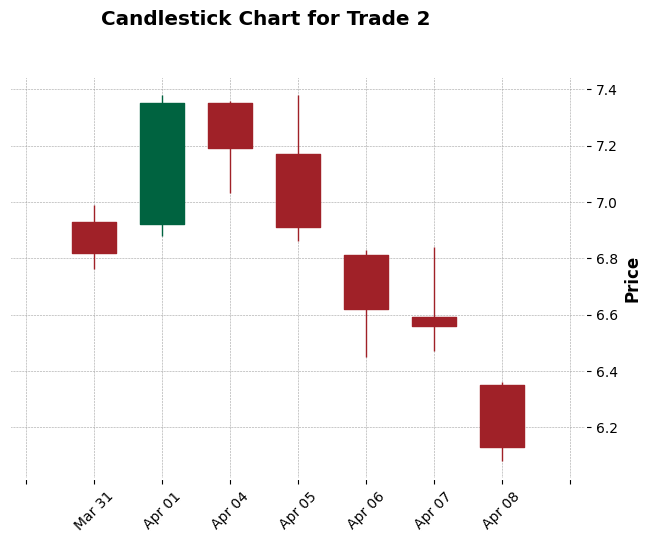


Negociação 3 - Data de Entrada: 2022-07-22 00:00:00, Data de Saída: 2022-07-25 00:00:00
Preço de Entrada: R$3.05, Preço de Saída: R$2.89
Lucro: R$-0.16, Custo: R$3.05



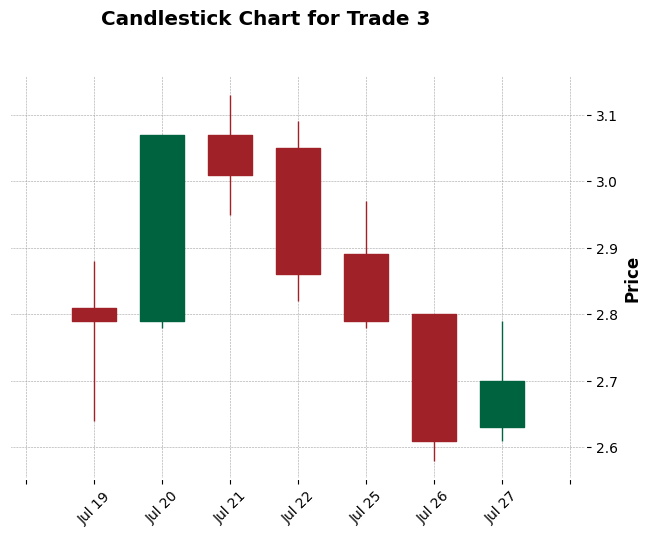


Negociação 4 - Data de Entrada: 2022-08-09 00:00:00, Data de Saída: 2022-08-11 00:00:00
Preço de Entrada: R$3.34, Preço de Saída: R$3.33
Lucro: R$-0.01, Custo: R$3.34



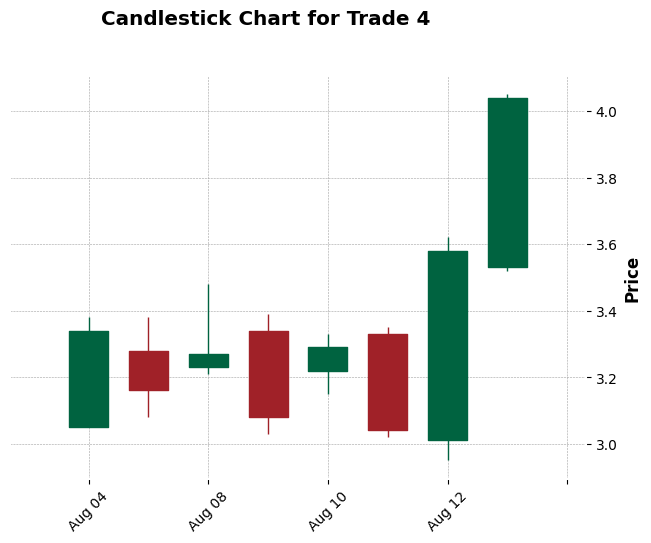


Negociação 5 - Data de Entrada: 2022-08-19 00:00:00, Data de Saída: 2022-08-23 00:00:00
Preço de Entrada: R$3.92, Preço de Saída: R$3.87
Lucro: R$-0.05, Custo: R$3.92



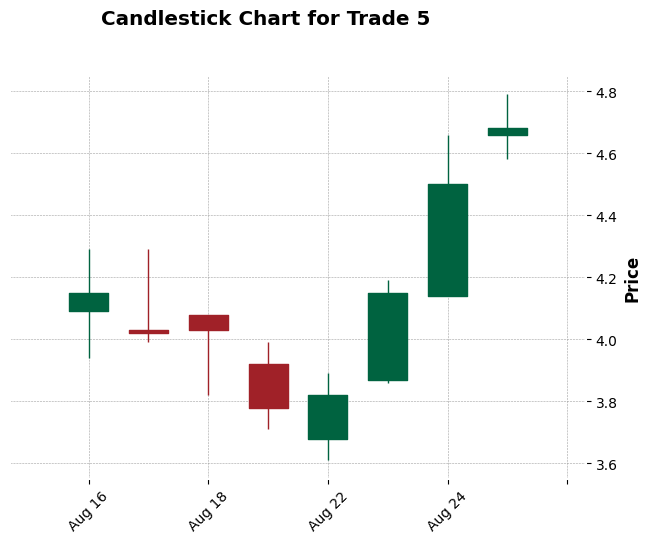


Negociação 6 - Data de Entrada: 2022-10-11 00:00:00, Data de Saída: 2022-10-13 00:00:00
Preço de Entrada: R$5.32, Preço de Saída: R$5.17
Lucro: R$-0.15, Custo: R$5.32



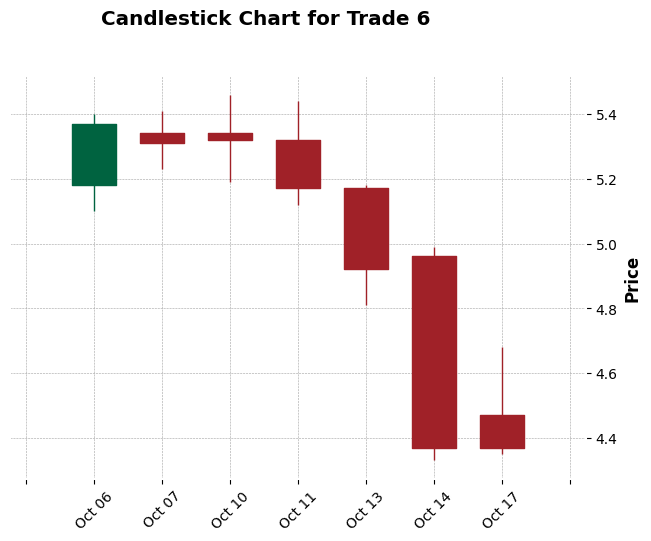


Negociação 7 - Data de Entrada: 2022-11-07 00:00:00, Data de Saída: 2022-11-09 00:00:00
Preço de Entrada: R$4.80, Preço de Saída: R$4.63
Lucro: R$-0.17, Custo: R$4.80



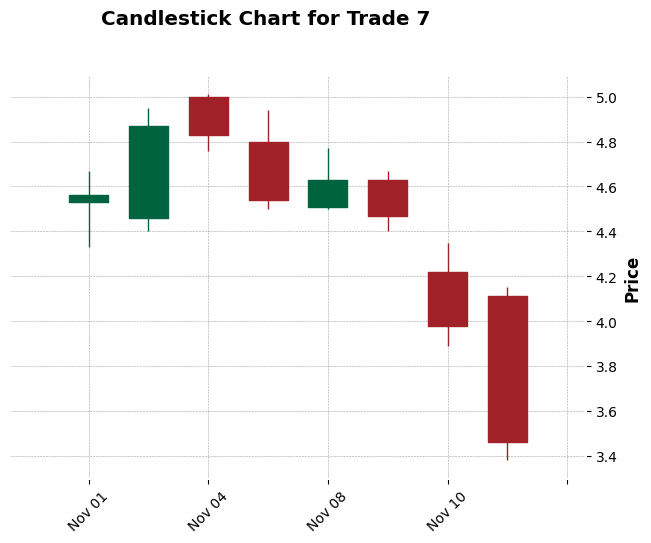

In [ ]:
import yfinance as yf
import pandas as pd
import mplfinance as mpf

# Function to backtest the 9.2 buying setup for a given stock
def backtest_9_2_setup_brazil(stock_code, entry_threshold=0.01):
    # Fetch stock data from the B3 exchange
    brazilian_stock_code = f"{stock_code}.SA"
    try:
        stock_data = yf.download(brazilian_stock_code, start="2022-01-01", end="2023-01-01")
    except Exception as e:
        print(f"Error fetching data for {stock_code}: {e}")
        return None

    # Calculate the Exponential Moving Average (EMA) with a 9-period window
    stock_data['EMA9'] = stock_data['Close'].ewm(span=9, adjust=False).mean()

    # Initialize variables to track the setup and trades
    in_trade = False
    entry_date = None

    setup_formed = 0
    setup_stopped = 0
    setup_completed = 0
    total_earnings = 0
    total_costs = 0
    trade_performance = []

    # Backtest the 9.2 buying setup
    for i in range(1, len(stock_data)):
        if not in_trade and stock_data['EMA9'][i] > stock_data['EMA9'][i - 1]:
            if stock_data['Close'][i] < stock_data['Low'][i - 1]:
                in_trade = True
                entry_date = stock_data.index[i]
                setup_formed += 1

        if in_trade:
            if stock_data['Close'][i] > stock_data['High'][i - 1]:
                in_trade = False
                setup_completed += 1
                exit_date = stock_data.index[i]
                entry_price = stock_data['Open'][stock_data.index.get_loc(entry_date)]
                exit_price = stock_data['Open'][stock_data.index.get_loc(exit_date)]
                trade_earnings = (exit_price - entry_price)
                trade_costs = entry_price
                total_earnings += trade_earnings
                total_costs += trade_costs
                trade_performance.append({
                    'Entry Date': entry_date,
                    'Exit Date': exit_date,
                    'Entry Price': entry_price,
                    'Exit Price': exit_price,
                    'Earnings': trade_earnings,
                    'Costs': trade_costs,
                })
            elif stock_data['EMA9'][i] < stock_data['EMA9'][i - 1]:
                in_trade = False
                setup_stopped += 1
                exit_date = stock_data.index[i]
                entry_price = stock_data['Open'][stock_data.index.get_loc(entry_date)]
                exit_price = stock_data['Open'][stock_data.index.get_loc(exit_date)]
                trade_earnings = (exit_price - entry_price)
                trade_costs = entry_price
                total_earnings += trade_earnings
                total_costs += trade_costs
                trade_performance.append({
                    'Entry Date': entry_date,
                    'Exit Date': exit_date,
                    'Entry Price': entry_price,
                    'Exit Price': exit_price,
                    'Earnings': trade_earnings,
                    'Costs': trade_costs,
                })

    return {
        'Setup Formed': setup_formed,
        'Setup Stopped': setup_stopped,
        'Setup Completed': setup_completed,
        'Total Earnings': total_earnings,
        'Total Costs': total_costs,
        'Trade Performance': trade_performance,
        'Stock Data': stock_data
    }

if __name__ == "__main__":
    stock_code = input("Digite o código da ação brasileira: ")

    setup_results = backtest_9_2_setup_brazil(stock_code)

    if setup_results:
        print(f"Resultados do Setup 9.2 para a Ação {stock_code}:")
        print(f"Setup Formed: {setup_results['Setup Formed']}")
        print(f"Setup Stopped: {setup_results['Setup Stopped']}")
        print(f"Setup Completed: {setup_results['Setup Completed']}")
        print(f"Total Earnings: R${setup_results['Total Earnings']:.2f}")
        print(f"Total Costs: R${setup_results['Total Costs']:.2f}")

        # Print trade performance details
        print("\nDetalhes do Desempenho das Negociações:")
        for i, trade in enumerate(setup_results['Trade Performance']):
            print(f"Negociação {i + 1} - Data de Entrada: {trade['Entry Date']}, Data de Saída: {trade['Exit Date']}")
            print(f"Preço de Entrada: R${trade['Entry Price']:.2f}, Preço de Saída: R${trade['Exit Price']:.2f}")
            print(f"Lucro: R${trade['Earnings']:.2f}, Custo: R${trade['Costs']:.2f}")
            print()

            # Add candlestick chart for each trade
            entry_index = setup_results['Stock Data'].index.get_loc(trade['Entry Date'])
            exit_index = setup_results['Stock Data'].index.get_loc(trade['Exit Date'])
            start_index = max(0, entry_index - 3)
            end_index = min(len(setup_results['Stock Data']) - 1, exit_index + 3)
            trade_data = setup_results['Stock Data'].iloc[start_index:end_index]

            mpf.plot(trade_data, type='candle', style='charles', title=f'Candlestick Chart for Trade {i + 1}')
            print()
    else:
        print("Nenhum resultado encontrado.")


Digite o código da ação brasileira: mglu3
[*********************100%%**********************]  1 of 1 completed
Resultados do Setup 9.2 para a Ação mglu3:
Setup Formado: 7
Setup Interrompido: 6
Setup Concluído: 1
Ganhos Totais: R$-1.02
Custos Totais: R$34.81

Detalhes do Desempenho das Negociações:
Negociação 1 - Data de Entrada: 2022-01-28 00:00:00, Data de Saída: 2022-02-02 00:00:00
Preço de Entrada: R$7.21, Preço de Saída: R$7.09
Ganhos: R$-0.12, Custos: R$7.21



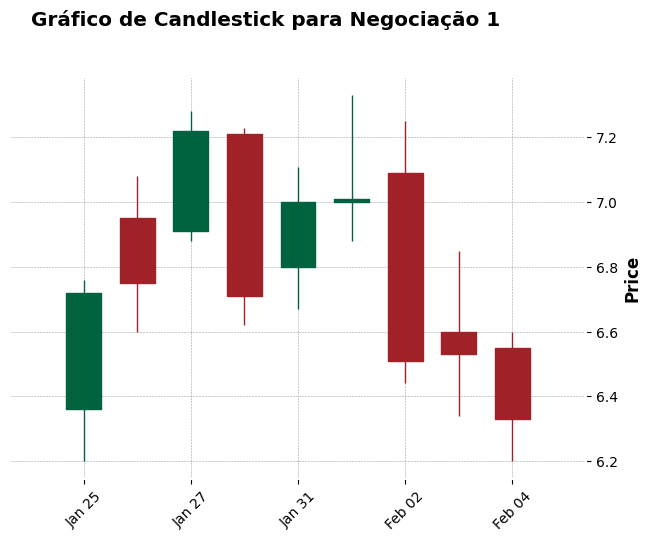


Negociação 2 - Data de Entrada: 2022-04-05 00:00:00, Data de Saída: 2022-04-06 00:00:00
Preço de Entrada: R$7.17, Preço de Saída: R$6.81
Ganhos: R$-0.36, Custos: R$7.17



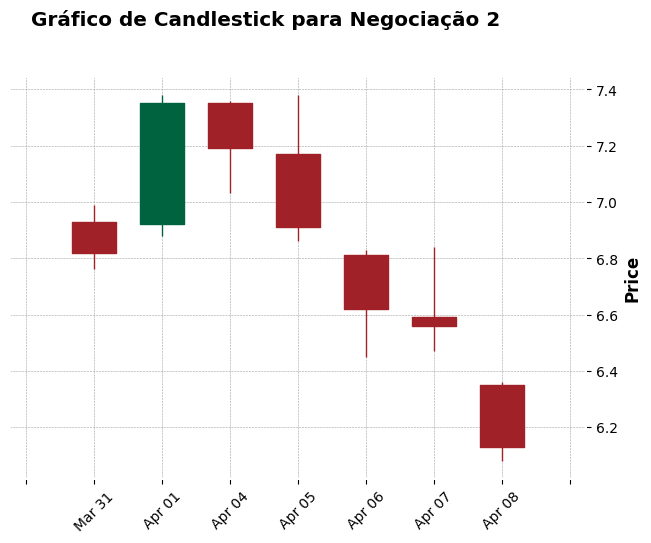


Negociação 3 - Data de Entrada: 2022-07-22 00:00:00, Data de Saída: 2022-07-25 00:00:00
Preço de Entrada: R$3.05, Preço de Saída: R$2.89
Ganhos: R$-0.16, Custos: R$3.05



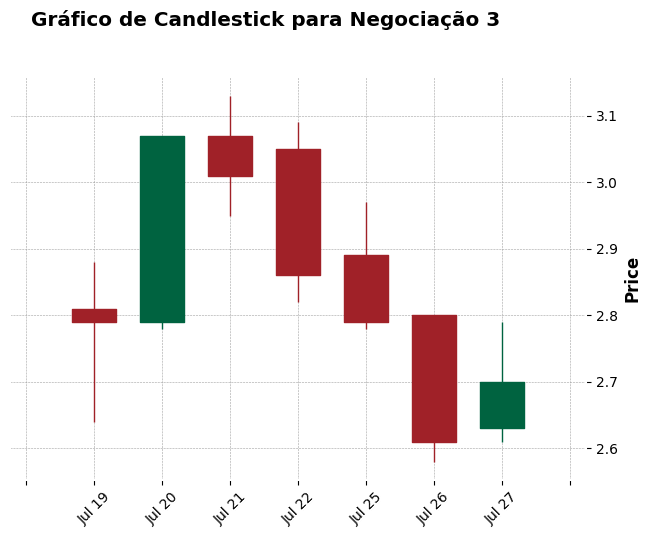


Negociação 4 - Data de Entrada: 2022-08-09 00:00:00, Data de Saída: 2022-08-11 00:00:00
Preço de Entrada: R$3.34, Preço de Saída: R$3.33
Ganhos: R$-0.01, Custos: R$3.34



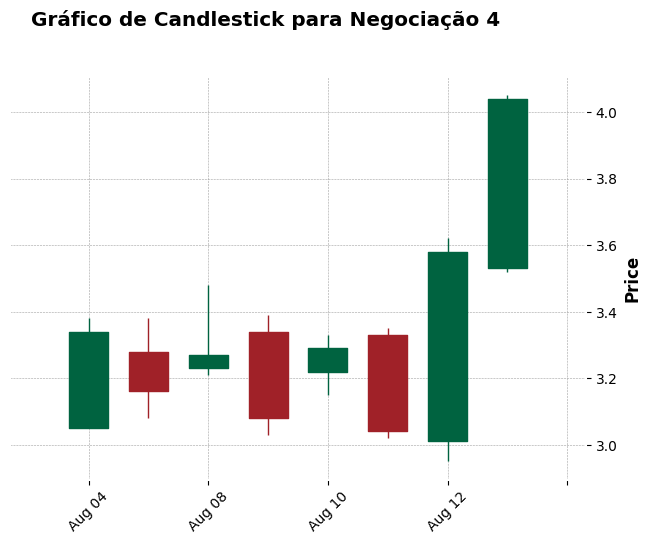


Negociação 5 - Data de Entrada: 2022-08-19 00:00:00, Data de Saída: 2022-08-23 00:00:00
Preço de Entrada: R$3.92, Preço de Saída: R$3.87
Ganhos: R$-0.05, Custos: R$3.92



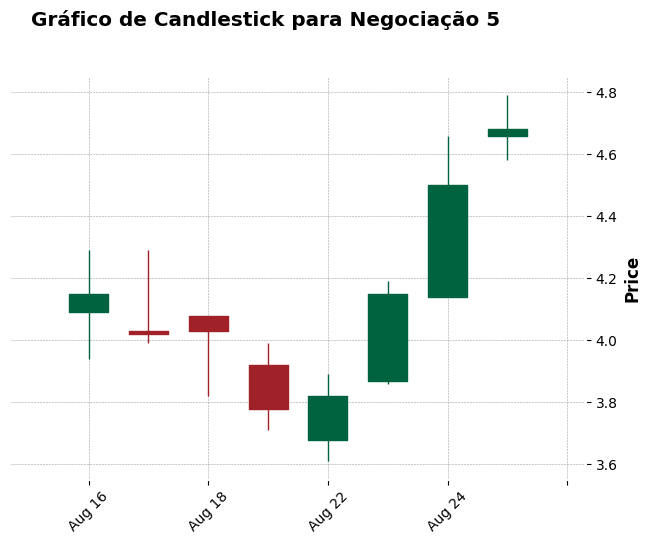


Negociação 6 - Data de Entrada: 2022-10-11 00:00:00, Data de Saída: 2022-10-13 00:00:00
Preço de Entrada: R$5.32, Preço de Saída: R$5.17
Ganhos: R$-0.15, Custos: R$5.32



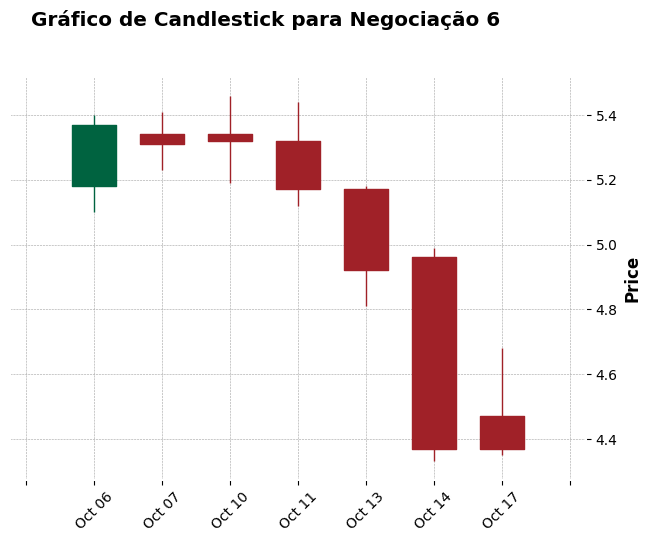


Negociação 7 - Data de Entrada: 2022-11-07 00:00:00, Data de Saída: 2022-11-09 00:00:00
Preço de Entrada: R$4.80, Preço de Saída: R$4.63
Ganhos: R$-0.17, Custos: R$4.80



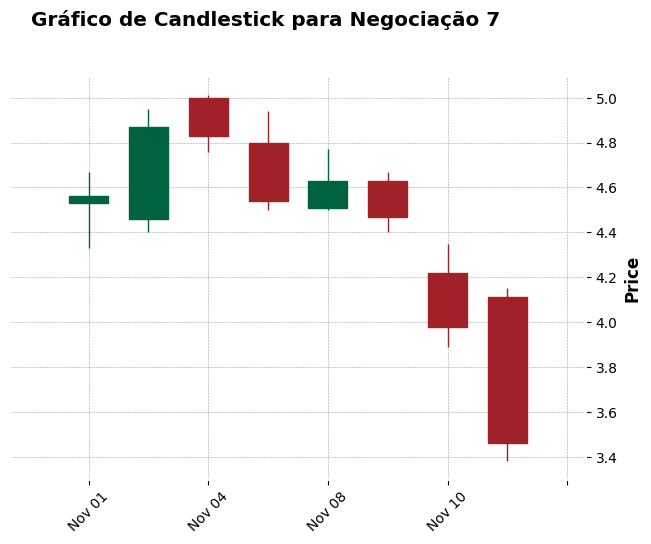

In [7]:
import yfinance as yf
import pandas as pd
import mplfinance as mpf

# Função para fazer backtest do setup de compra 9.2 para uma ação específica
def backtest_9_2_setup_brasil(codigo_acao, threshold_entrada=0.01):
    # Obter dados da ação da Bolsa de Valores B3
    codigo_acao_brasileira = f"{codigo_acao}.SA"
    try:
        dados_acao = yf.download(codigo_acao_brasileira, start="2022-01-01", end="2023-01-01")
    except Exception as e:
        print(f"Erro ao buscar dados para {codigo_acao}: {e}")
        return None

    # Calcular a Média Móvel Exponencial (EMA) com janela de 9 períodos
    dados_acao['EMA9'] = dados_acao['Close'].ewm(span=9, adjust=False).mean()

    # Inicializar variáveis para rastrear o setup e as negociações
    em_negociacao = False
    data_entrada = None

    setup_formado = 0
    setup_interrompido = 0
    setup_concluído = 0
    ganhos_totais = 0
    custos_totais = 0
    desempenho_negociacao = []

    # Fazer backtest do setup de compra 9.2
    for i in range(1, len(dados_acao)):
        if not em_negociacao and dados_acao['EMA9'][i] > dados_acao['EMA9'][i - 1]:
            if dados_acao['Close'][i] < dados_acao['Low'][i - 1]:
                em_negociacao = True
                data_entrada = dados_acao.index[i]
                setup_formado += 1

        if em_negociacao:
            if dados_acao['Close'][i] > dados_acao['High'][i - 1]:
                em_negociacao = False
                setup_concluído += 1
                data_saida = dados_acao.index[i]
                preço_entrada = dados_acao['Open'][dados_acao.index.get_loc(data_entrada)]
                preço_saida = dados_acao['Open'][dados_acao.index.get_loc(data_saida)]
                ganhos_negociacao = (preço_saida - preço_entrada)
                custos_negociacao = preço_entrada
                ganhos_totais += ganhos_negociacao
                custos_totais += custos_negociacao
                desempenho_negociacao.append({
                    'Data de Entrada': data_entrada,
                    'Data de Saída': data_saida,
                    'Preço de Entrada': preço_entrada,
                    'Preço de Saída': preço_saida,
                    'Ganhos': ganhos_negociacao,
                    'Custos': custos_negociacao,
                })
            elif dados_acao['EMA9'][i] < dados_acao['EMA9'][i - 1]:
                em_negociacao = False
                setup_interrompido += 1
                data_saida = dados_acao.index[i]
                preço_entrada = dados_acao['Open'][dados_acao.index.get_loc(data_entrada)]
                preço_saida = dados_acao['Open'][dados_acao.index.get_loc(data_saida)]
                ganhos_negociacao = (preço_saida - preço_entrada)
                custos_negociacao = preço_entrada
                ganhos_totais += ganhos_negociacao
                custos_totais += custos_negociacao
                desempenho_negociacao.append({
                    'Data de Entrada': data_entrada,
                    'Data de Saída': data_saida,
                    'Preço de Entrada': preço_entrada,
                    'Preço de Saída': preço_saida,
                    'Ganhos': ganhos_negociacao,
                    'Custos': custos_negociacao,
                })

    return {
        'Setup Formado': setup_formado,
        'Setup Interrompido': setup_interrompido,
        'Setup Concluído': setup_concluído,
        'Ganhos Totais': ganhos_totais,
        'Custos Totais': custos_totais,
        'Desempenho de Negociação': desempenho_negociacao,
        'Dados da Ação': dados_acao
    }

if __name__ == "__main__":
    codigo_acao = input("Digite o código da ação brasileira: ")

    resultados_setup = backtest_9_2_setup_brasil(codigo_acao)

    if resultados_setup:
        print(f"Resultados do Setup 9.2 para a Ação {codigo_acao}:")
        print(f"Setup Formado: {resultados_setup['Setup Formado']}")
        print(f"Setup Interrompido: {resultados_setup['Setup Interrompido']}")
        print(f"Setup Concluído: {resultados_setup['Setup Concluído']}")
        print(f"Ganhos Totais: R${resultados_setup['Ganhos Totais']:.2f}")
        print(f"Custos Totais: R${resultados_setup['Custos Totais']:.2f}")

        # Imprimir detalhes do desempenho das negociações
        print("\nDetalhes do Desempenho das Negociações:")
        for i, negociação in enumerate(resultados_setup['Desempenho de Negociação']):
            print(f"Negociação {i + 1} - Data de Entrada: {negociação['Data de Entrada']}, Data de Saída: {negociação['Data de Saída']}")
            print(f"Preço de Entrada: R${negociação['Preço de Entrada']:.2f}, Preço de Saída: R${negociação['Preço de Saída']:.2f}")
            print(f"Ganhos: R${negociação['Ganhos']:.2f}, Custos: R${negociação['Custos']:.2f}")
            print()

            # Adicionar gráfico de candlestick para cada negociação
            índice_entrada = resultados_setup['Dados da Ação'].index.get_loc(negociação['Data de Entrada'])
            índice_saída = resultados_setup['Dados da Ação'].index.get_loc(negociação['Data de Saída'])
            índice_inicial = max(0, índice_entrada - 3)
            índice_final = min(len(resultados_setup['Dados da Ação']) - 1, índice_saída + 3)
            dados_negociação = resultados_setup['Dados da Ação'].iloc[índice_inicial:índice_final]

            mpf.plot(dados_negociação, type='candle', style='charles', title=f'Gráfico de Candlestick para Negociação {i + 1}')
            print()
    else:
        print("Nenhum resultado encontrado.")
